# **1. IMPORT LIBRARIES**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# **2. LOAD THE DATASET**

In [18]:
data_path = ('/content/wine.csv')
df = pd.read_csv(data_path)

print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)
print("Data types of the columns:\n", df.dtypes)
print("First few rows:\n", df.head())
print("Summary statistics:\n", df.describe())

Shape of the dataset: (178, 14)
Columns in the dataset: Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')
Data types of the columns:
 Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object
First few rows:
    Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3

# **3. VISUALIZATIONS**

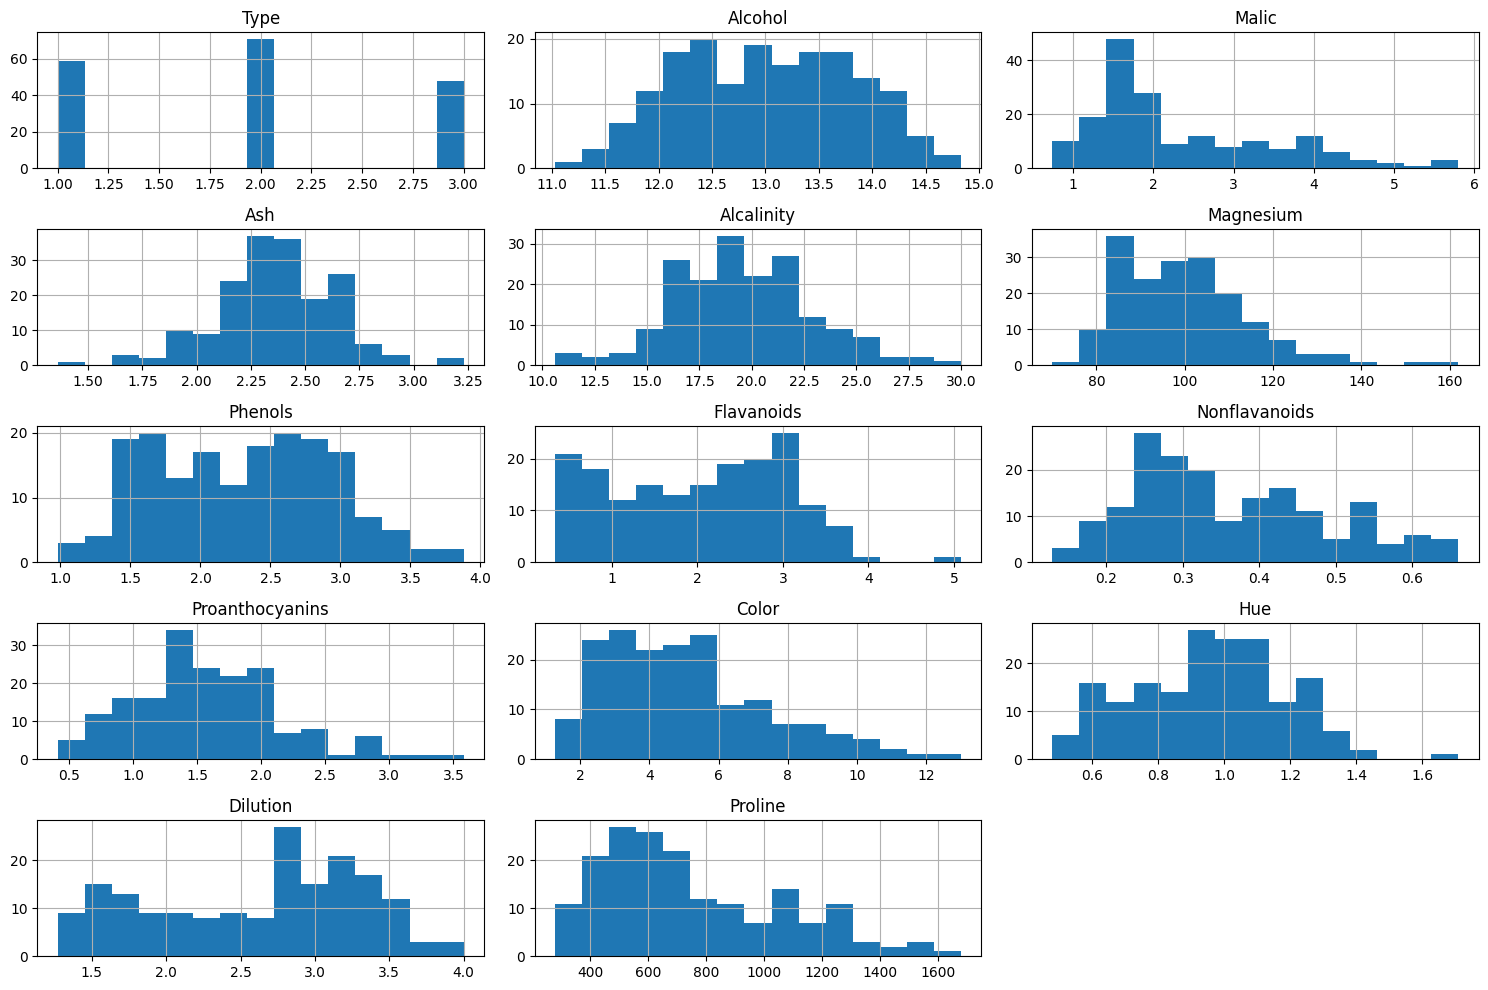

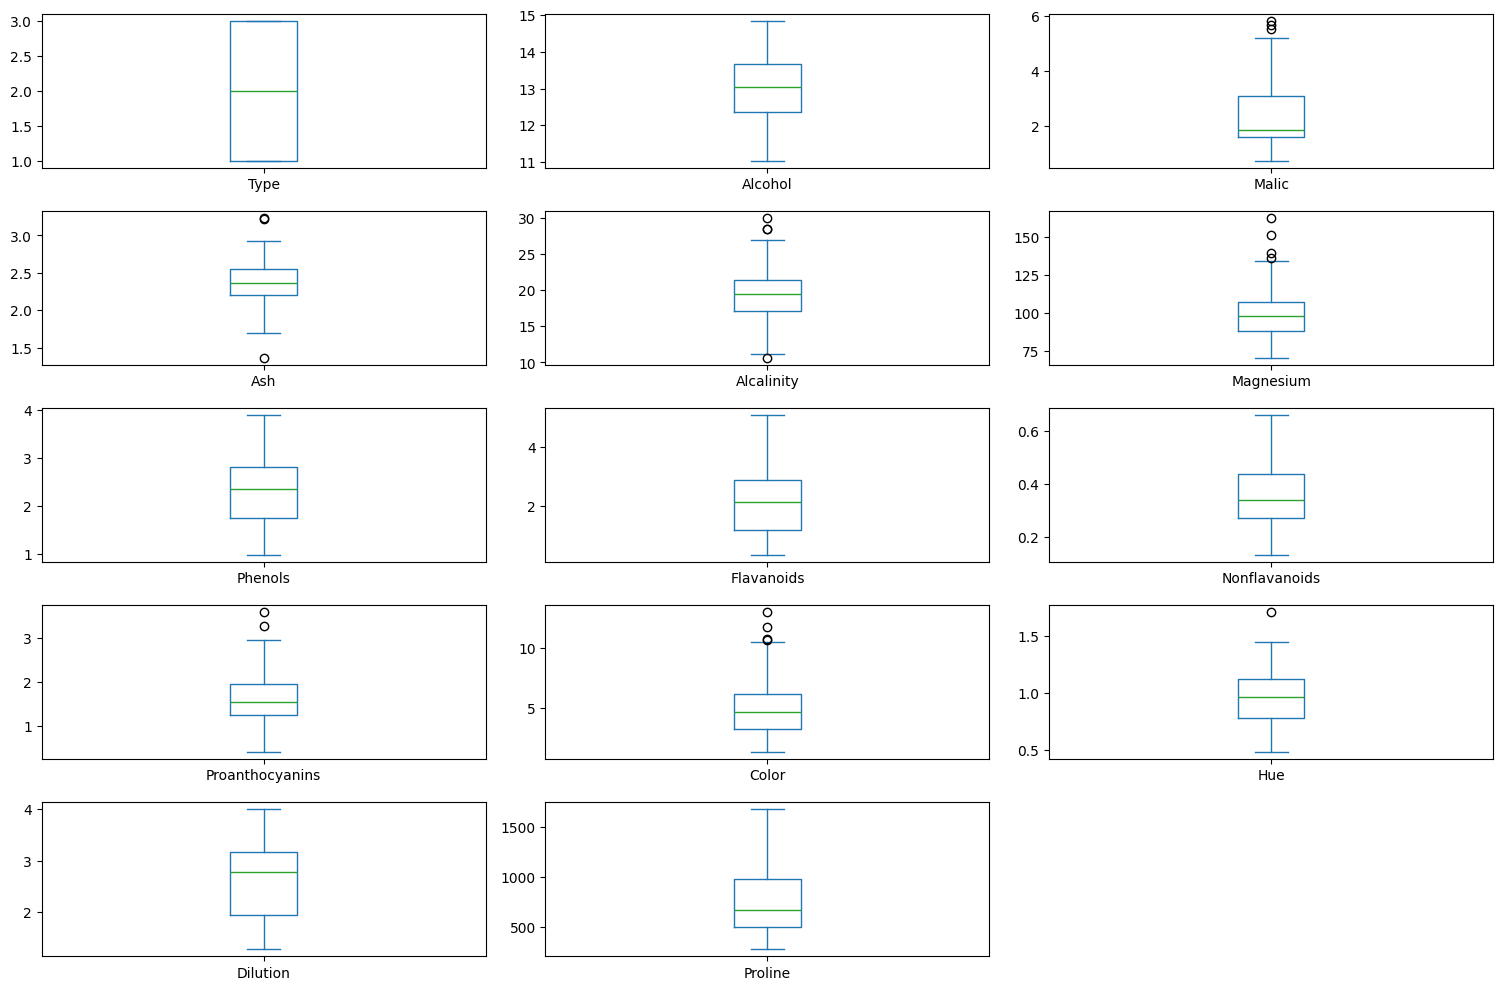

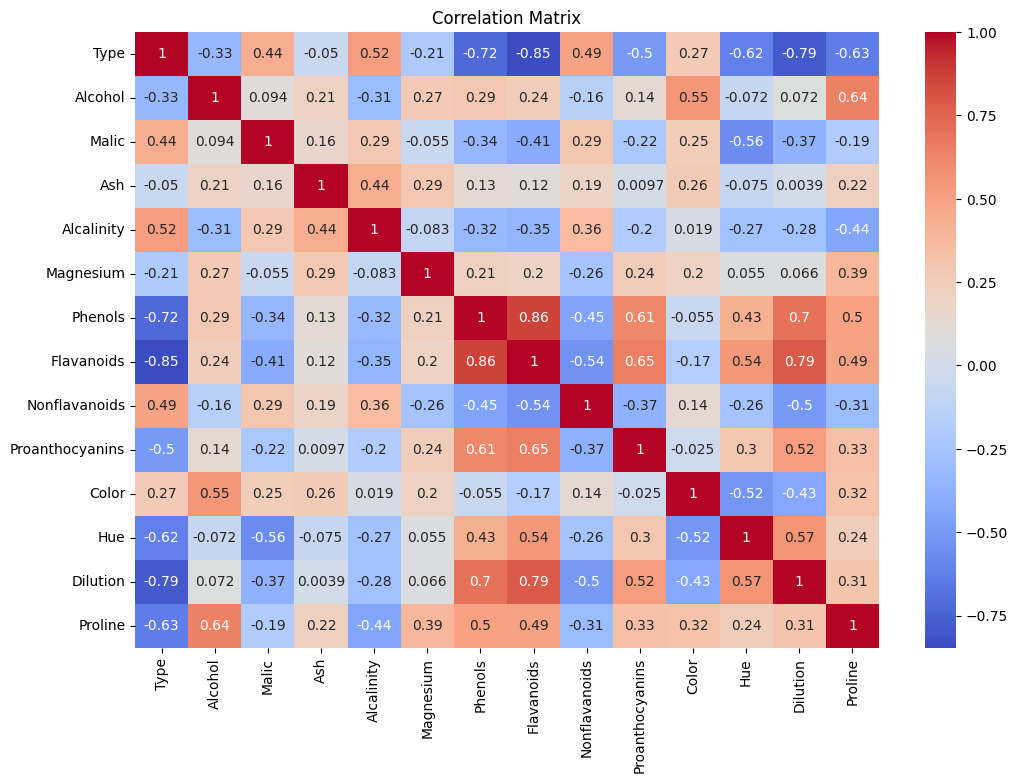

In [19]:
# Histograms
df.hist(bins=15, figsize=(15, 10), layout=(5, 3))
plt.tight_layout()
plt.show()

# Box plots
df.plot(kind='box', subplots=True, layout=(5, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **4. PCA: DIMENSIONALITY REDUCTION**

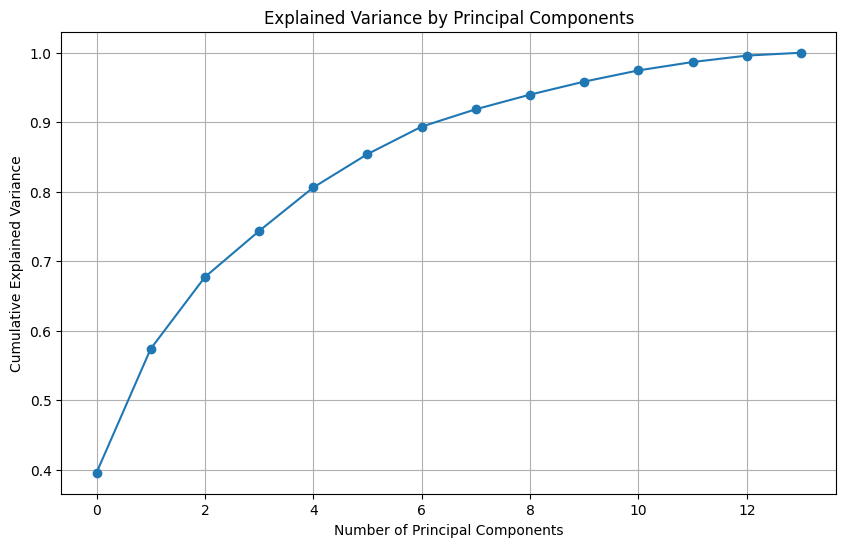

Optimal number of principal components: 10


In [20]:
# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Scree plot (explained variance)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Find number of components to retain 95% variance
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of principal components: {n_components}")

# Transform data with optimal components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# **5. CLUSTERING WITH ORIGINAL DATA**

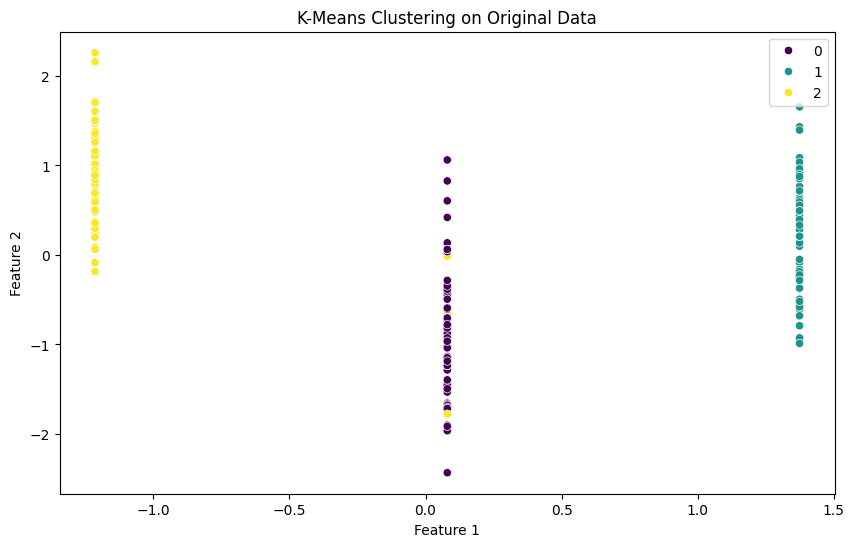

Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773


In [21]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Visualization (using first 2 original features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Clustering performance
silhouette_original = silhouette_score(scaled_data, kmeans_labels)
davies_bouldin_original = davies_bouldin_score(scaled_data, kmeans_labels)

print(f"Silhouette Score (Original Data): {silhouette_original}")
print(f"Davies-Bouldin Index (Original Data): {davies_bouldin_original}")

# **6. CLUSTERING WITH PCA DATA**

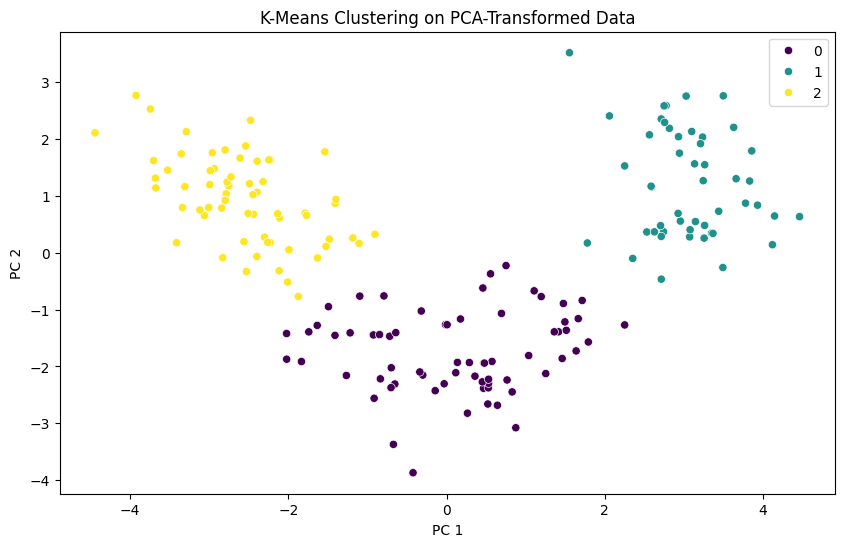

Silhouette Score (PCA Data): 0.32292055407233017
Davies-Bouldin Index (PCA Data): 1.2578453408449173


In [23]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_data)

# Visualization using PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_pca_labels, palette='viridis')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# Clustering performance on PCA data
silhouette_pca = silhouette_score(pca_data, kmeans_pca_labels)
davies_bouldin_pca = davies_bouldin_score(pca_data, kmeans_pca_labels)

print(f"Silhouette Score (PCA Data): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}")

# **7. COMPARISON & ANALYSIS**

In [24]:
print(f"\nSilhouette Score - Original Data: {silhouette_original:.3f}, PCA Data: {silhouette_pca:.3f}")
print(f"Davies-Bouldin Index - Original Data: {davies_bouldin_original:.3f}, PCA Data: {davies_bouldin_pca:.3f}")

similarities = "Both clustering results show clear separation of clusters."
differences = "PCA clustering often leads to more compact clusters due to reduced noise and dimensions."
impact_of_pca = "PCA helps focus on the most important components, improving clustering efficiency in high-dimensional spaces."

print("\nSimilarities:", similarities)
print("Differences:", differences)
print("Impact of PCA on Clustering:", impact_of_pca)


Silhouette Score - Original Data: 0.306, PCA Data: 0.323
Davies-Bouldin Index - Original Data: 1.316, PCA Data: 1.258

Similarities: Both clustering results show clear separation of clusters.
Differences: PCA clustering often leads to more compact clusters due to reduced noise and dimensions.
Impact of PCA on Clustering: PCA helps focus on the most important components, improving clustering efficiency in high-dimensional spaces.


# **8. CONCLUSION AND INSIGHTS**

In [25]:
print("1. Key Findings and Insights")
print("The dataset contains multiple numerical features that show varying levels of correlation, as visualized using histograms, boxplots, and a heatmap.\n")

print(f"Principal Component Analysis (PCA) revealed that just a few components (specifically, n = {n_components}) were sufficient to explain 95% of the variance, significantly reducing the dimensionality without major information loss.\n")

print("KMeans clustering was applied on both the original scaled data and the PCA-transformed data. Clustering performance was evaluated using Silhouette Score and Davies-Bouldin Index.\n")

print("Original Data:")
print(f"Silhouette Score: {silhouette_original:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_original:.3f}\n")

print("PCA Data:")
print(f"Silhouette Score: {silhouette_pca:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_pca:.3f}\n")

print("PCA-transformed data led to more compact and well-separated clusters, showing that dimensionality reduction can enhance clustering quality in high-dimensional datasets.\n")

print("2. Practical Implications of PCA and Clustering")
print("PCA is an essential technique when working with high-dimensional datasets. It:\n"
      "- Reduces noise and redundancy in the data.\n"
      "- Lowers computational cost.\n"
      "- Helps visualize complex datasets in 2D or 3D plots.\n")

print("Clustering, particularly with KMeans, is useful for unsupervised segmentation of data. When combined with PCA:\n"
      "- It results in more meaningful clusters.\n"
      "- It improves efficiency by eliminating irrelevant features.\n"
      "- It avoids overfitting to noise from high-dimensional data.\n")

print("3. Recommendations for Using PCA and Clustering")
print("Use PCA before clustering when:\n"
      "- The dataset has a large number of correlated features.\n"
      "- You want to improve cluster compactness and reduce dimensionality for better performance.\n"
      "- Visualizing data in fewer dimensions is important for interpretation.\n")

print("Use clustering on original data if:\n"
      "- The dataset has already been curated to contain only relevant and uncorrelated features.\n"
      "- Preserving the original feature interpretability is critical.\n")

print("Overall, the combined use of PCA followed by clustering is highly recommended for exploratory data analysis, customer segmentation, pattern discovery, and dimensionality reduction tasks.")


1. Key Findings and Insights
The dataset contains multiple numerical features that show varying levels of correlation, as visualized using histograms, boxplots, and a heatmap.

Principal Component Analysis (PCA) revealed that just a few components (specifically, n = 10) were sufficient to explain 95% of the variance, significantly reducing the dimensionality without major information loss.

KMeans clustering was applied on both the original scaled data and the PCA-transformed data. Clustering performance was evaluated using Silhouette Score and Davies-Bouldin Index.

Original Data:
Silhouette Score: 0.306
Davies-Bouldin Index: 1.316

PCA Data:
Silhouette Score: 0.323
Davies-Bouldin Index: 1.258

PCA-transformed data led to more compact and well-separated clusters, showing that dimensionality reduction can enhance clustering quality in high-dimensional datasets.

2. Practical Implications of PCA and Clustering
PCA is an essential technique when working with high-dimensional datasets. It